In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys
import os.path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from UniformTrees.dust import dualgraph, rescalate

In [22]:
grafo = dualgraph((3, 3))

f = grafo.graph.get_start()
print(f)
grafo.wilson()
s = grafo.path
print(s)

[0, 1]
[array([[1, 0],
       [0, 0],
       [0, 1]]), array([[1, 2],
       [0, 2],
       [0, 1]]), array([[2, 0],
       [1, 0]]), array([[1, 1],
       [1, 0]]), array([[2, 2],
       [1, 2]]), array([[2, 1],
       [1, 1]])]


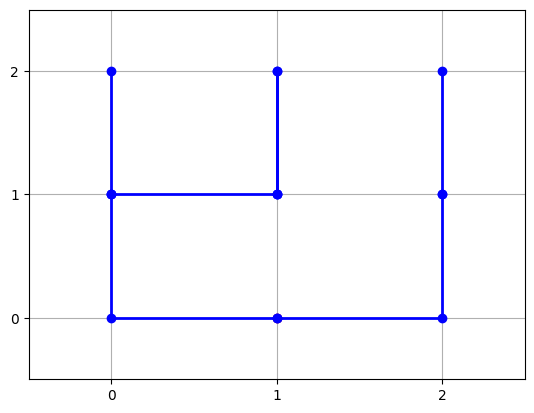

In [23]:
count = 0
arr = []
for i in s:
    for j in i:
        arr.append(j)
    arr.append(None)  # Marcador para separar listas
    count += 1
M = grafo.graph.grid

m, n = M.shape
fig, ax = plt.subplots()
ax.set_xlim(-0.5, n-0.5)
ax.set_ylim(-0.5, m-0.5)
ax.set_xticks(np.arange(M.shape[0]))
ax.set_yticks(np.arange(M.shape[1]))
ax.grid(True)

# Punto inicial en rojo
ax.plot(f[1], f[0], 'ro', label='Punto a')  # punto `a` en rojo

# Lista para manejar las líneas acumuladas
lines = []
current_xdata, current_ydata = [], []

def init():
    return lines

def update(frame):
    global current_xdata, current_ydata
    if arr[frame] is None:  # Detectar cambio de sublista
        # Crear una nueva línea para la siguiente sublista
        new_line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
        lines.append(new_line)  # Guardar la línea actual
        current_xdata, current_ydata = [], []  # Reiniciar los datos
    else:
        x, y = arr[frame]
        current_xdata.append(x)
        current_ydata.append(y)

        # Actualizar la línea actual en tiempo real
        if len(lines) > 0:
            lines[-1].set_data(current_ydata, current_xdata)
        else:
            line, = ax.plot(current_ydata, current_xdata, color='blue', marker='o', linestyle='-', lw=2)
            lines.append(line)  # Crear la primera línea si no existe
    return lines


anim = FuncAnimation(fig,
                     update,
                     frames=len(arr),
                     init_func=init,
                     blit=False,  # Necesario para redibujar todo
                     interval=500)

HTML(anim.to_jshtml())


In [24]:
grafo.scalate()

In [25]:
grafo.gridact()
print(grafo.grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
a = np.array((np.array([6,0])-np.array([10,0]))/4, dtype=int)
b = np.array([10,0])+a
c = b+a
d = c+a
e = d+a
f = np.array([10,0])
print(a)
print(f)
print(b)
print(c)
print(d)
print(e)

[-1  0]
[10  0]
[9 0]
[8 0]
[7 0]
[6 0]


In [27]:
grafo.scalate()
print(grafo.grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
print(grafo.path)

[array([[1, 0],
       [0, 0],
       [0, 1]]), array([[1, 2],
       [0, 2],
       [0, 1]]), array([[2, 0],
       [1, 0]]), array([[1, 1],
       [1, 0]]), array([[2, 2],
       [1, 2]]), array([[2, 1],
       [1, 1]])]


In [29]:
print(grafo.actives)

[array([6, 2]), array([5, 2]), array([4, 2]), array([3, 2]), array([2, 2]), array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]), array([ 6, 10]), array([ 5, 10]), array([ 4, 10]), array([ 3, 10]), array([ 2, 10]), array([2, 9]), array([2, 8]), array([2, 7]), array([2, 6]), array([10,  2]), array([9, 2]), array([8, 2]), array([7, 2]), array([6, 2]), array([6, 6]), array([6, 5]), array([6, 4]), array([6, 3]), array([6, 2]), array([10, 10]), array([ 9, 10]), array([ 8, 10]), array([ 7, 10]), array([ 6, 10]), array([10,  6]), array([9, 6]), array([8, 6]), array([7, 6]), array([6, 6]), array([6, 2]), array([5, 2]), array([4, 2]), array([3, 2]), array([2, 2]), array([2, 3]), array([2, 4]), array([2, 5]), array([2, 6]), array([ 6, 10]), array([ 5, 10]), array([ 4, 10]), array([ 3, 10]), array([ 2, 10]), array([2, 9]), array([2, 8]), array([2, 7]), array([2, 6]), array([10,  2]), array([9, 2]), array([8, 2]), array([7, 2]), array([6, 2]), array([6, 6]), array([6, 5]), array([6, 4]), arr

In [30]:
grafo.scalate()
grafo.gridact()
print(grafo.grid)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
